<a href="https://colab.research.google.com/github/TakshSoni123/SkinType-Detection/blob/master/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###IMPORTS



In [ ]:
!pip install opencv-python

In [ ]:
 from google.colab.patches import cv2_imshow

In [ ]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 2.8MB/s 


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import math
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
from keras.optimizers import SGD, Adam
from keras.utils.vis_utils import plot_model

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive



###DATASET PREPROCESS (Dataset on personel drive)



In [ ]:
train = ImageDataGenerator(rescale=1/255, horizontal_flip=True)
# validate = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/My Drive/data/train', batch_size=3,
                                          class_mode='binary', target_size=(100,100))
# validate_dataset = validate.flow_from_directory('/content/drive/My Drive/data/validation', batch_size=3,
#                                           class_mode='binary', target_size=(100,100))

Found 52 images belonging to 2 classes.


In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

###MODEL DESIGN AND TRAIN

In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100,100,3)),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
# # The third convolution
# tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),
# # The fourth convolution
# tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),
# # # The fifth convolution
# tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               8667648   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6

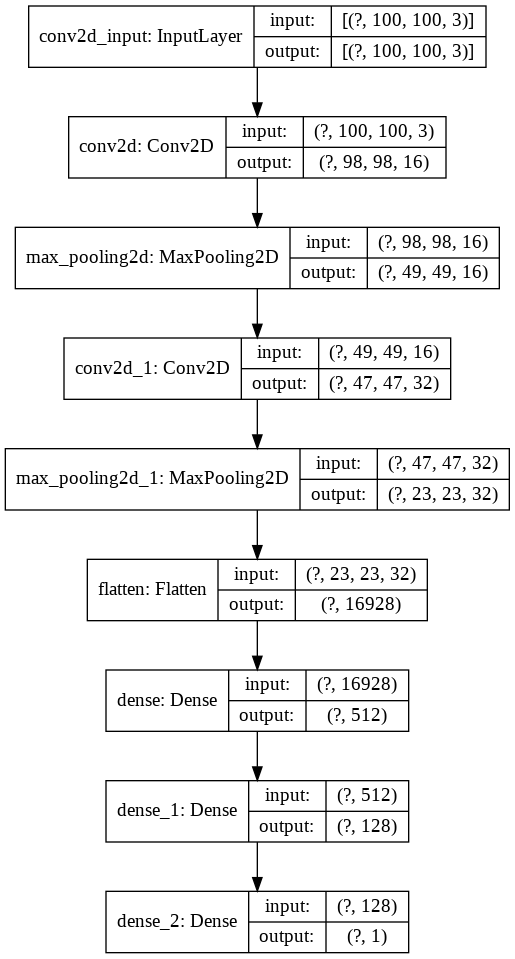

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.0003), metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=50)

Epoch 1/50
18/18 [==============================] - 3s 156ms/step - loss: 0.9760 - accuracy: 0.5577
Epoch 2/50
18/18 [==============================] - 3s 156ms/step - loss: 0.7640 - accuracy: 0.5192
Epoch 3/50
18/18 [==============================] - 3s 156ms/step - loss: 0.7293 - accuracy: 0.5192
Epoch 4/50
18/18 [==============================] - 3s 155ms/step - loss: 0.6940 - accuracy: 0.4423
Epoch 5/50
18/18 [==============================] - 3s 153ms/step - loss: 0.7011 - accuracy: 0.5192
Epoch 6/50
18/18 [==============================] - 3s 158ms/step - loss: 0.7013 - accuracy: 0.5769
Epoch 7/50
18/18 [==============================] - 3s 160ms/step - loss: 0.6907 - accuracy: 0.5000
Epoch 8/50
18/18 [==============================] - 3s 154ms/step - loss: 0.6915 - accuracy: 0.5962
Epoch 9/50
18/18 [==============================] - 3s 154ms/step - loss: 0.6888 - accuracy: 0.5769
Epoch 10/50
18/18 [==============================] - 3s 155ms/step - loss: 0.6703 - accuracy: 0.5385

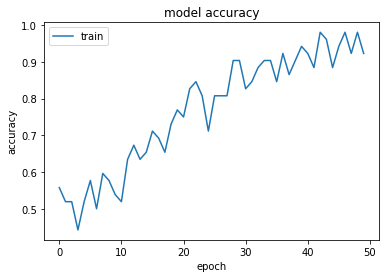

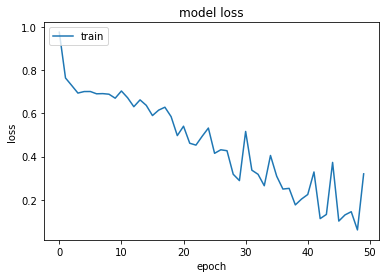

In [ ]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('final_model.h5')

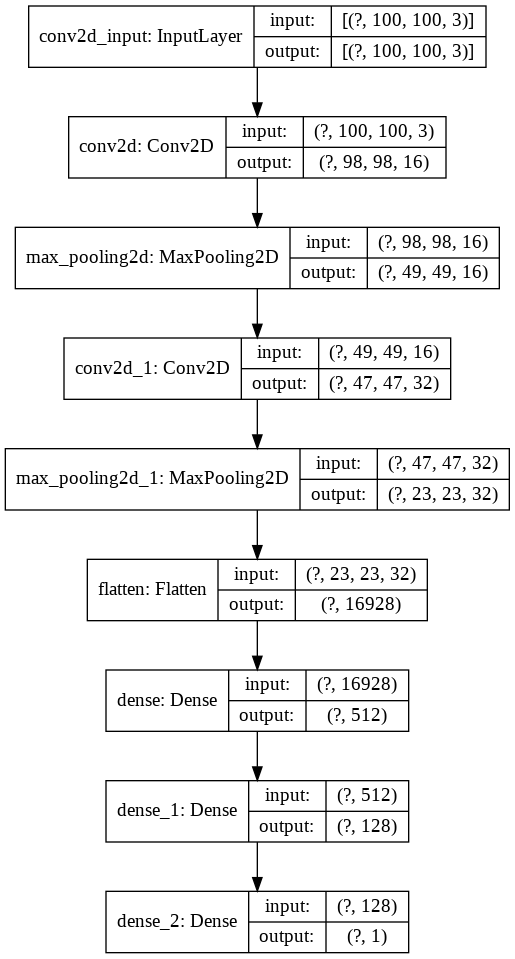

In [ ]:
plot_model(m, to_file='model.png', show_shapes=True, show_layer_names=True)

###LOAD MODEL (Model on drive)

In [ ]:
m = tf.keras.models.load_model('/content/drive/My Drive/data/final_model.h5')

###MODEL TESTING

In [ ]:
def testDryImages():
  count = 0
  for i in range(1,10):
    img = image.load_img('/content/drive/My Drive/data/test/dry/'+str(i)+'.jpg', target_size=(100,100))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    val = np.round(model.predict(images))
    # print(val)
    if(val==0):
      print("DRY")
      count +=1
    elif(val==1):
      print("OILY")
  return count

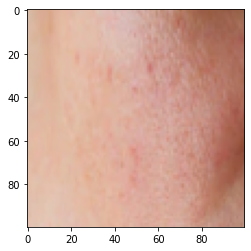

DRY


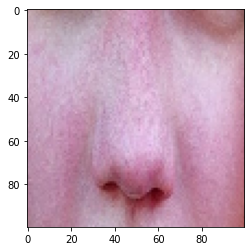

DRY


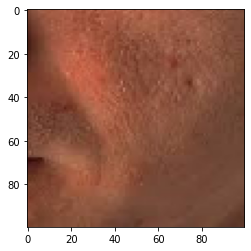

DRY


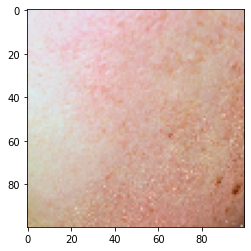

DRY


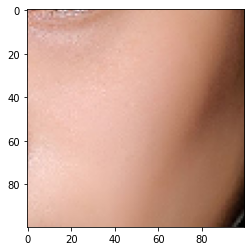

OILY


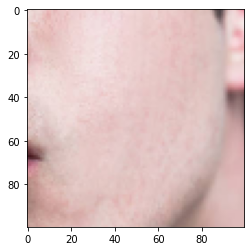

OILY


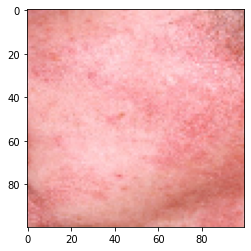

DRY


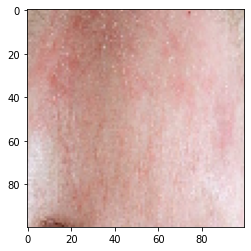

DRY


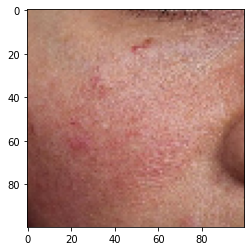

DRY


In [ ]:
dry_count = testDryImages()

In [ ]:
def testOilyImages():
  count = 0
  for i in range(1,11):
    img = image.load_img('/content/drive/My Drive/data/test/oily/'+str(i)+'.jpg', target_size=(100,100))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    val = np.round(model.predict(images))
    if(val==0):
      print("DRY")
    elif(val==1):
      print("OILY")
      count +=1

  return count

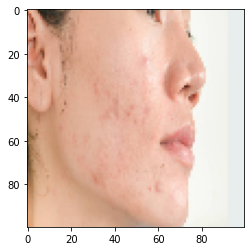

OILY


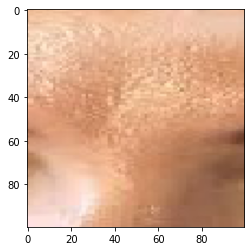

OILY


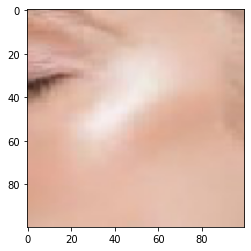

OILY


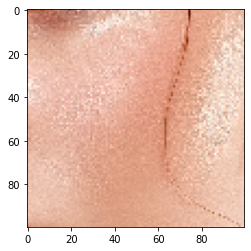

OILY


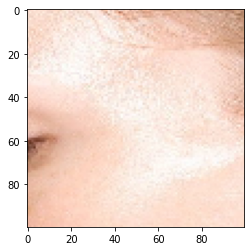

OILY


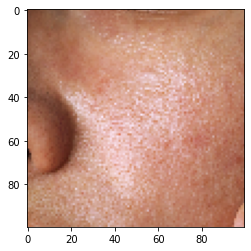

OILY


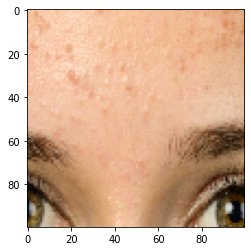

DRY


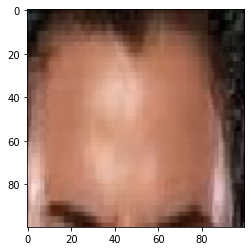

OILY


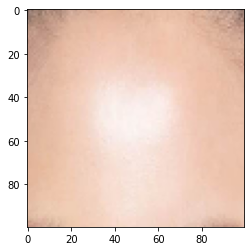

OILY


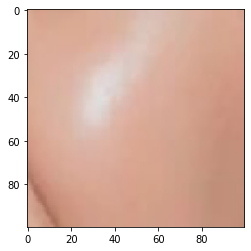

OILY


In [ ]:
oily_count = testOilyImages()

In [ ]:
 def getAcc(dry_count, oily_count, total_images):
   return (dry_count+oily_count)/total_images

In [ ]:
getAcc(dry_count, oily_count, 19)

0.8421052631578947

In [ ]:
m.evaluate(train_dataset)

18/18 [==============================] - 0s 28ms/step - loss: 0.2769 - accuracy: 0.8462


[0.276935875415802, 0.8461538553237915]

In [ ]:
img = image.load_img('dry.jpg', target_size=(100,100))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
val = model.predict_proba(images)
print(val)

###NECESSARY FUNCTIONS FOR PREDICTION

In [ ]:
# draw each face separately
def draw_faces(filename, result_list):
	# load the image
  data = pyplot.imread(filename)
	# plot each face as a subplot
  for i in range(len(result_list)):
		# get coordinates
    x1, y1, width, height = result_list[i]['box']
    x2, y2 = x1 + width, y1 + height
		# define subplot
    pyplot.subplot(1, len(result_list), i+1)
    pyplot.axis('off')
		# plot face
    pyplot.imshow(data[y1:y2, x1:x2])
    break
	# show the plot
  pyplot.savefig('out1.jpg')
  pyplot.show()

In [ ]:
def detect_and_draw_face(filename):
  pixels = pyplot.imread(filename)
  detector = MTCNN()
  faces = detector.detect_faces(pixels)
  draw_faces(filename, faces)

In [ ]:
def get_facial_features(filename):
  
  print('Forehead')
  img = cv2.imread('out1.jpg')
  forehead = img[50:100, 160:280]
  cv2_imshow(forehead)
  cv2.imwrite('forehead.jpg', forehead)
  print('Left cheek')
  cheek1 = img[130:200, 150:200]
  cv2_imshow(cheek1)
  cv2.imwrite('cheek1.jpg', cheek1)
  print("Nose")
  nose = img[130:190, 200:240]
  cv2_imshow(nose)
  cv2.imwrite('nose.jpg', nose)
  print("Right cheek")
  cheek2 = img[140:200, 240:290]
  cv2_imshow(cheek2)
  cv2.imwrite('cheek2.jpg', cheek2)
  return ['forehead', 'nose', 'cheek1', 'cheek2']

In [ ]:
def predict_for_each_facial_feature(features):
  count = 0
  for i in features:
    img = image.load_img(i+'.jpg', target_size=(100,100))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    val = np.round(m.predict(images))
    if(val==0):
      print("DRY")
    elif(val==1):
      count +=1
      print("OILY")
  return count*25

###RECOMMENDATION MODULE

In [ ]:
rec_data = {0:'Andalou Naturals Purple Carrot + C Luminous Night Cream', 25:'Nivea Soft Moisturizing Creme', 50:'Rovectin-Skin Reboot Night Care Pack',75:'Aveeno Clear Complexion Foaming Cleanser', 100:'SkinMedica BHA/AHA Exfoliating Cleanser'}

In [ ]:
rec_data

{0: 'Andalou Naturals Purple Carrot + C Luminous Night Cream',
 25: 'Nivea Soft Moisturizing Creme',
 50: 'Rovectin-Skin Reboot Night Care Pack',
 75: 'Aveeno Clear Complexion Foaming Cleanser',
 100: 'SkinMedica BHA/AHA Exfoliating Cleanser'}

###FINAL FUNCTION AND RESULT

In [ ]:
def final_func(filename):

  print()
  print("*"*40)
  print()
  print("FACE DETECTION MODULE:")
  detect_and_draw_face(filename)

  print()
  print("*"*40)
  print()
  print("FACIAL FEATURE EXTRACTION MODULE:")
  features = get_facial_features(filename)

  print()
  print("*"*40)
  print()
  print("SKIN TYPE DETECTION MODULE: ")
  percentage = predict_for_each_facial_feature(features)

  print()
  print("*"*40)
  print()
  print("PRODUCT RECOMMENDED IS " + rec_data[percentage])
  print("*"*40)


****************************************

FACE DETECTION MODULE:


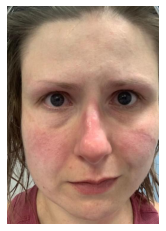


****************************************

FACIAL FEATURE EXTRACTION MODULE:
Forehead


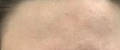

Left cheek


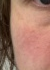

Nose


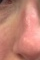

Right cheek


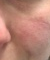


****************************************

SKIN TYPE DETECTION MODULE: 


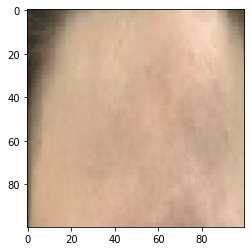

OILY


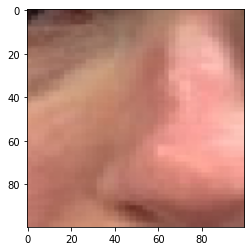

OILY


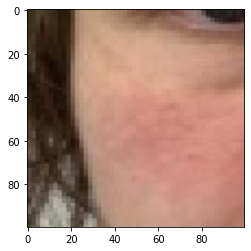

DRY


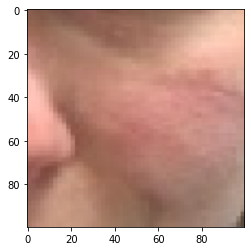

DRY

****************************************

PRODUCT RECOMMENDED IS Rovectin-Skin Reboot Night Care Pack
****************************************


In [ ]:
final_func('test1.jpg')


****************************************

FACE DETECTION MODULE:


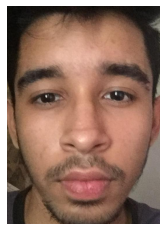


****************************************

FACIAL FEATURE EXTRACTION MODULE:
Forehead


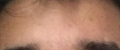

Left cheek


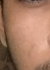

Nose


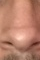

Right cheek


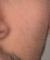


****************************************

SKIN TYPE DETECTION MODULE: 


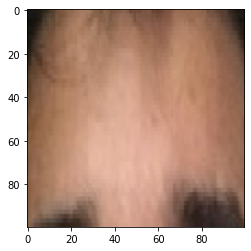

OILY


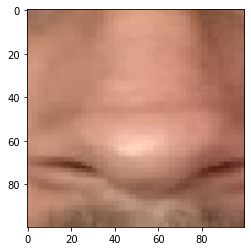

DRY


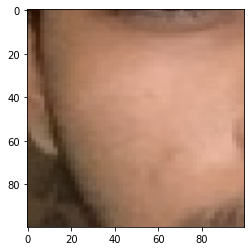

DRY


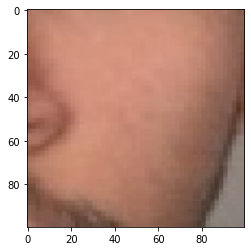

DRY

****************************************

PRODUCT RECOMMENDED IS Nivea Soft Moisturizing Creme
****************************************


In [ ]:
final_func('test_taksh.jpg')